# **ARTIFICIAL INTELLIGENCE NANODEGREE**
CIFAR-10 DATASET (*CNN TRAINING*)

In [0]:
# STEP 1= LOAD CIFAR-10 DATABASE

import keras 
from keras.datasets import cifar10

# load the pre-shuffles test-train data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

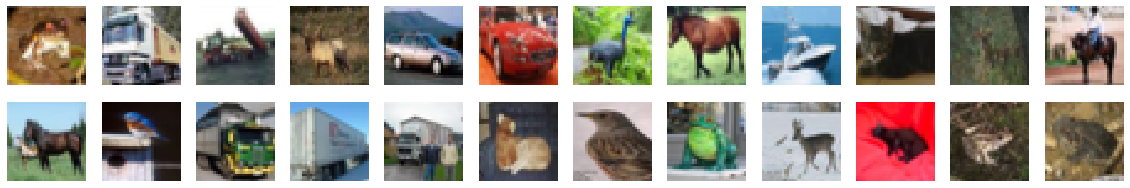

In [22]:
# STEP 2= VISUALIZE  THE FIRST  24 TRAINING IMAGES 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
for i in range(24):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [0]:
# STEP 3= RESCALE THE IMAGES BY DIVIDING EVERY PIXEL IN EVERY IMAGE BY 255(rescale[0,255]--->[0,1])

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255



In [24]:
# STEP 4= BREAK THE DATASETS INTO TRAINING,TESTING AND VALIDATION SETS

from keras.utils import np_utils


# one-hot encode the labels
num_classes=len(np.unique(y_train))
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)


# break training set into training and validation sets
X_train,X_valid=X_train[5000:],X_train[:5000]
y_train,y_valid=y_train[5000:],y_train[:5000]

print('X_train shape:',X_train.shape)

print('number of training samples ',X_train.shape[0])
print('number of testing samples',X_test.shape[0])
print('number of validation samples ',X_valid.shape[0])


X_train shape: (45000, 32, 32, 3)
number of training samples  45000
number of testing samples 10000
number of validation samples  5000


In [25]:
# STEP 5= DEFINE THE MODEL OF ARCHITECTURE

from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())  # flatten convert multi-dimensional data into one-dimensional
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

SyntaxError: ignored

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
# STEP 6= COMPILE THE MODEL

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [28]:
#STEP 7= TRAIN THE MODEL

from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='CNN.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpointer],verbose=2,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 56s - loss: 1.8615 - acc: 0.3353 - val_loss: 1.8197 - val_acc: 0.3298

Epoch 00001: val_loss improved from inf to 1.81973, saving model to CNN.weights.best.hdf5
Epoch 2/10
 - 54s - loss: 1.8083 - acc: 0.3637 - val_loss: 1.7875 - val_acc: 0.3576

Epoch 00002: val_loss improved from 1.81973 to 1.78745, saving model to CNN.weights.best.hdf5
Epoch 3/10
 - 55s - loss: 1.8854 - acc: 0.3433 - val_loss: 1.7872 - val_acc: 0.3660

Epoch 00003: val_loss improved from 1.78745 to 1.78723, saving model to CNN.weights.best.hdf5
Epoch 4/10
 - 55s - loss: 1.9529 - acc: 0.3180 - val_loss: 2.0968 - val_acc: 0.3078

Epoch 00004: val_loss did not improve from 1.78723
Epoch 5/10
 - 53s - loss: 1.9995 - acc: 0.2998 - val_loss: 1.8084 - val_acc: 0.3598

Epoch 00005: val_loss did not improve from 1.78723
Epoch 6/10
 - 54s - loss: 2.0222 - acc: 0.2874 - val_loss: 2.1348 - val_acc: 0.2390

Epoch 00006: val_loss did not improve from 1.78723
Epoch 7/10

In [0]:
# STEP 8= LOAD THE MODEL WITH BEST VALIDATION ACCURACY

# load the weights that yielded best validation accuracy
model.load_weights('CNN.weights.best.hdf5')

In [32]:
# STEP 9= CALCULATE THE CLASSIFICATION ACCURACY ON TEST DATASET

score=model.evaluate(X_test,y_test,verbose=0)
print(score)
print('\n','Test accuracy:',score[1])

[1.7909110359191895, 0.3598]

 Test accuracy: 0.3598


In [0]:
# STEP 10= VISUALIZE SOME PREDICTIONS

preds= model.predict(X_test)

cifar10_labels=['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']


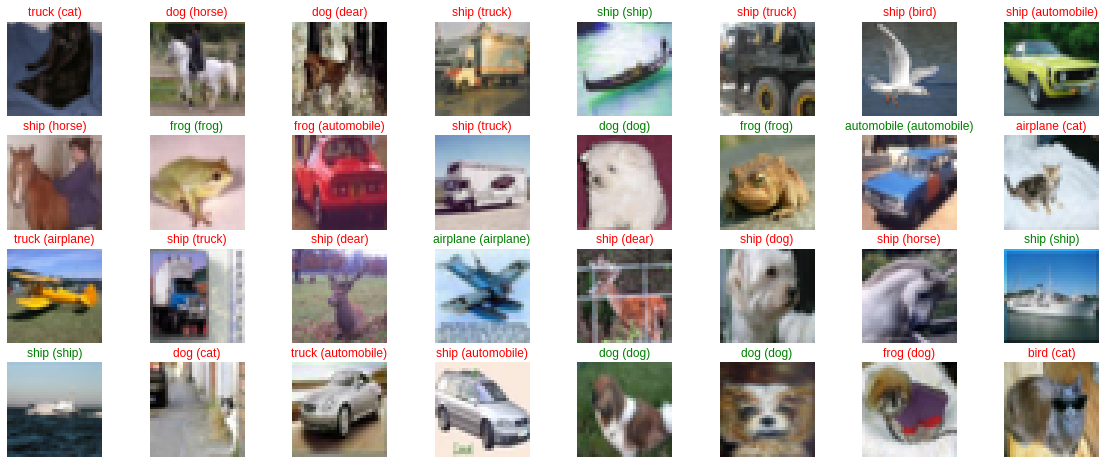

In [35]:
# plot a random sample of test images ,their predicted labels and ground truth

fig=plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx=np.argmax(preds[idx])
  true_idx=np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),color=("green" if pred_idx == true_idx else "red"))